# Segunda parte: validación

> ⚠️ Nota ⚠️
>
> Las conclusiones que sacamos en este archivo se encuentran comentadas en el notebook principal, de modo que no afecta al entrenamiento y/o comparación de los modelos futuros.

Revisando la celda que entrena el modelo, vemos que hay un error:

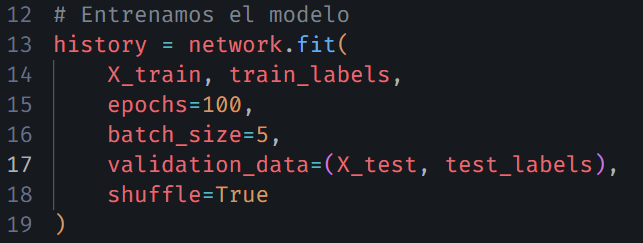

En *validation_data* deberían estar el segmento de datos de validación, no los de test. Esto se debe hacer así porque sino el modelo conoce los datos de test antes de hacer el propio test (data leakage) y puede afectar a los resultados del modelo.

Ahora, podemos aplicar, principalmente, dos tipos de validación:
- Validación simple.
- Validación cruzada (Cross-validation).

## Validación simple

Podemos utilizar varios tipos de validación simple. En esta práctica he optado por ver estos dos "tipos":
- El método *train_valid_test_split*.
- Segmentar los datos a mano.

### Método train_valid_test_split

Es una librería de *fast_ml* que realiza la división de forma directa, solo le tenemos que indicar:
- X
- target
- Tamaño de train
- Tamaño de validation
- Tamaño de test

También podemos añadir "method" con el que podemos aleatorizar los datos o no, e indicar una "seed" para poder replicar los resultados.

Debemos usar el df que genera `pandas` y no los array de `numpy` que se usan en el programa original.

>Lo malo de usar *train_valid_test_split* es que no existe el parámetro *stratify*, así existe la posibilidad de generar un bloque que solo tenga un tipo de tumor

Usando esta librería hemos obtenido los siguientes resultados con el modelo base:

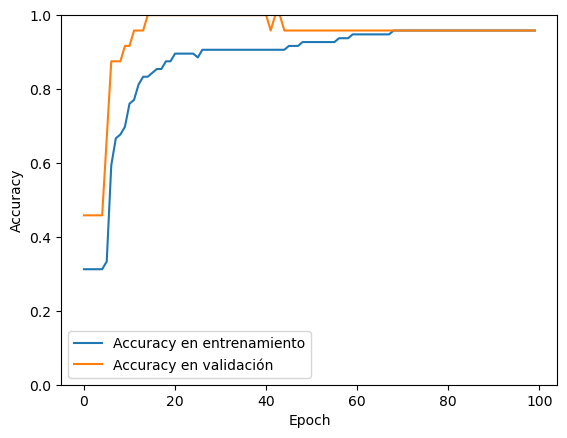

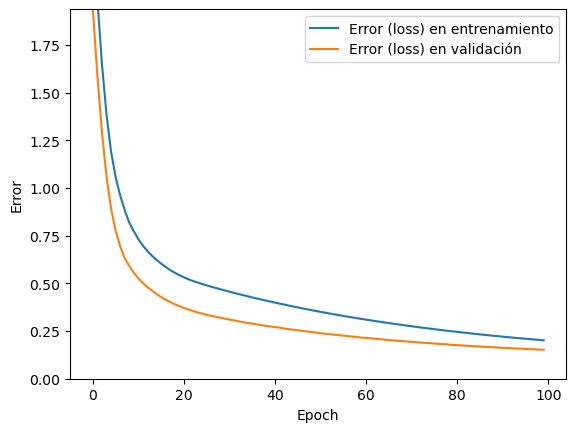

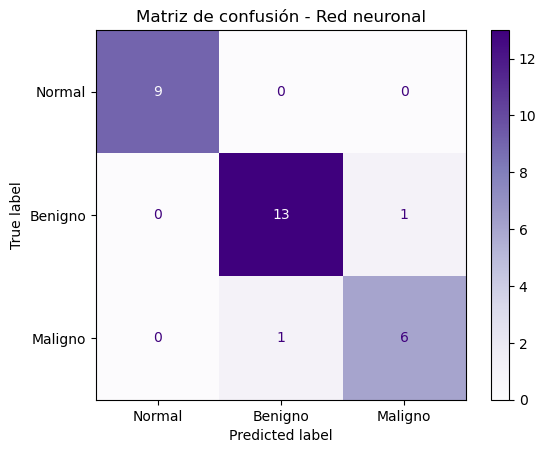

                  precision    recall  f1-score   support

          Normal       1.00      1.00      1.00         9
         Benigno       0.93      0.93      0.93        14
         Maligno       0.86      0.86      0.86         7

        accuracy                           0.93        30
       macro avg       0.93      0.93      0.93        30
    weighted avg       0.93      0.93      0.93        30

### Segmentar los datos a mano

Esta opción es más recomendable en mi opinión porque no tienes que importar una librería para una sola función.

Para ello realizamos un primer *train_test_split* sobre **X** e **y** (suponiendo que ya están definidas las variables de objetivo) de modo que obtenemos:
- X_train
- y_train
- X_test
- y_test

Ahora realizamos otro *train_test_split* sobre **X_train** e **y_train** (preferiblemente con las mismas proporciones que hemos hecho la primera división), de modo que obtenemos:
- X_train
- y_train
- X_val
- y_val 

Y una vez hechas estas dos divisiones nos quedamos con las siguientes variables:
- X_train
- y_train
- X_val
- y_val
- X_test
- y_test